<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - TRỰC QUAN HOÁ DỮ LIỆU 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Giai đoạn 2.1 - Khám phá dữ liệu (tiếp) 📌
</div>

### Nhập các thư viện cần thiết

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, date


warnings.simplefilter('ignore')

### Đọc dữ liệu

In [2]:
df = pd.read_csv('../Datasets/Water_Cleaner_1.csv', parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

### 1. Equidistant Timestamps 

Kiểm tra dữ liệu đã được sắp xếp theo thứ tự cũng như các điểm dữ liệu phải cách đều nhau.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4199 non-null   datetime64[ns]
 1   Rainfall              4199 non-null   float64       
 2   Depth_to_Groundwater  4172 non-null   float64       
 3   Temperature           4199 non-null   float64       
 4   Drainage_Volume       4198 non-null   float64       
 5   River_Hydrometry      4199 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 197.0 KB


In [4]:
df = df.sort_values(by='Date')

# Check time intervals
df['Time_Interval'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'Time_Interval']].head()

,Date,Time_Interval
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


Trong dữ liệu này, điều này đã được thực hiện: Khoảng thời gian là một ngày và dữ liệu đã được sắp xếp theo thứ tự thời gian. Do đó, không cần thực hiện bước chuẩn bị dữ liệu bổ sung này.

### 2. Handle Missings - Xử lý dữ liệu bị thiếu 

In [5]:
df = df.drop('Time_Interval', axis=1)
df.isnull().sum()

Date                     0
Rainfall                 0
Depth_to_Groundwater    27
Temperature              0
Drainage_Volume          1
River_Hydrometry         0
dtype: int64

- Như đã thấy, thì tập dữ liệu vẫn còn một số dữ liệu null.  
- Hơn nữa, trực quan theo Time-Series cho thấy các giá trị 0 là `null` đối với `Depth_to_Groundwater` và `Drainage_Volume`. Tiếp theo sẽ phải xử lý bằng cách thay thế bằng `NaN` và sau đó filling.
- Dựa trên biểu đồ heatmap ở phần **1.0**, `Drainage_Volume` và `River_Hydrometry` có mối tương quan dương. Vậy nên để việc xử lý dữ liệu được chắc chắn thì sẽ xử lý luôn cả thuộc tính `River_Hydrometry`. 

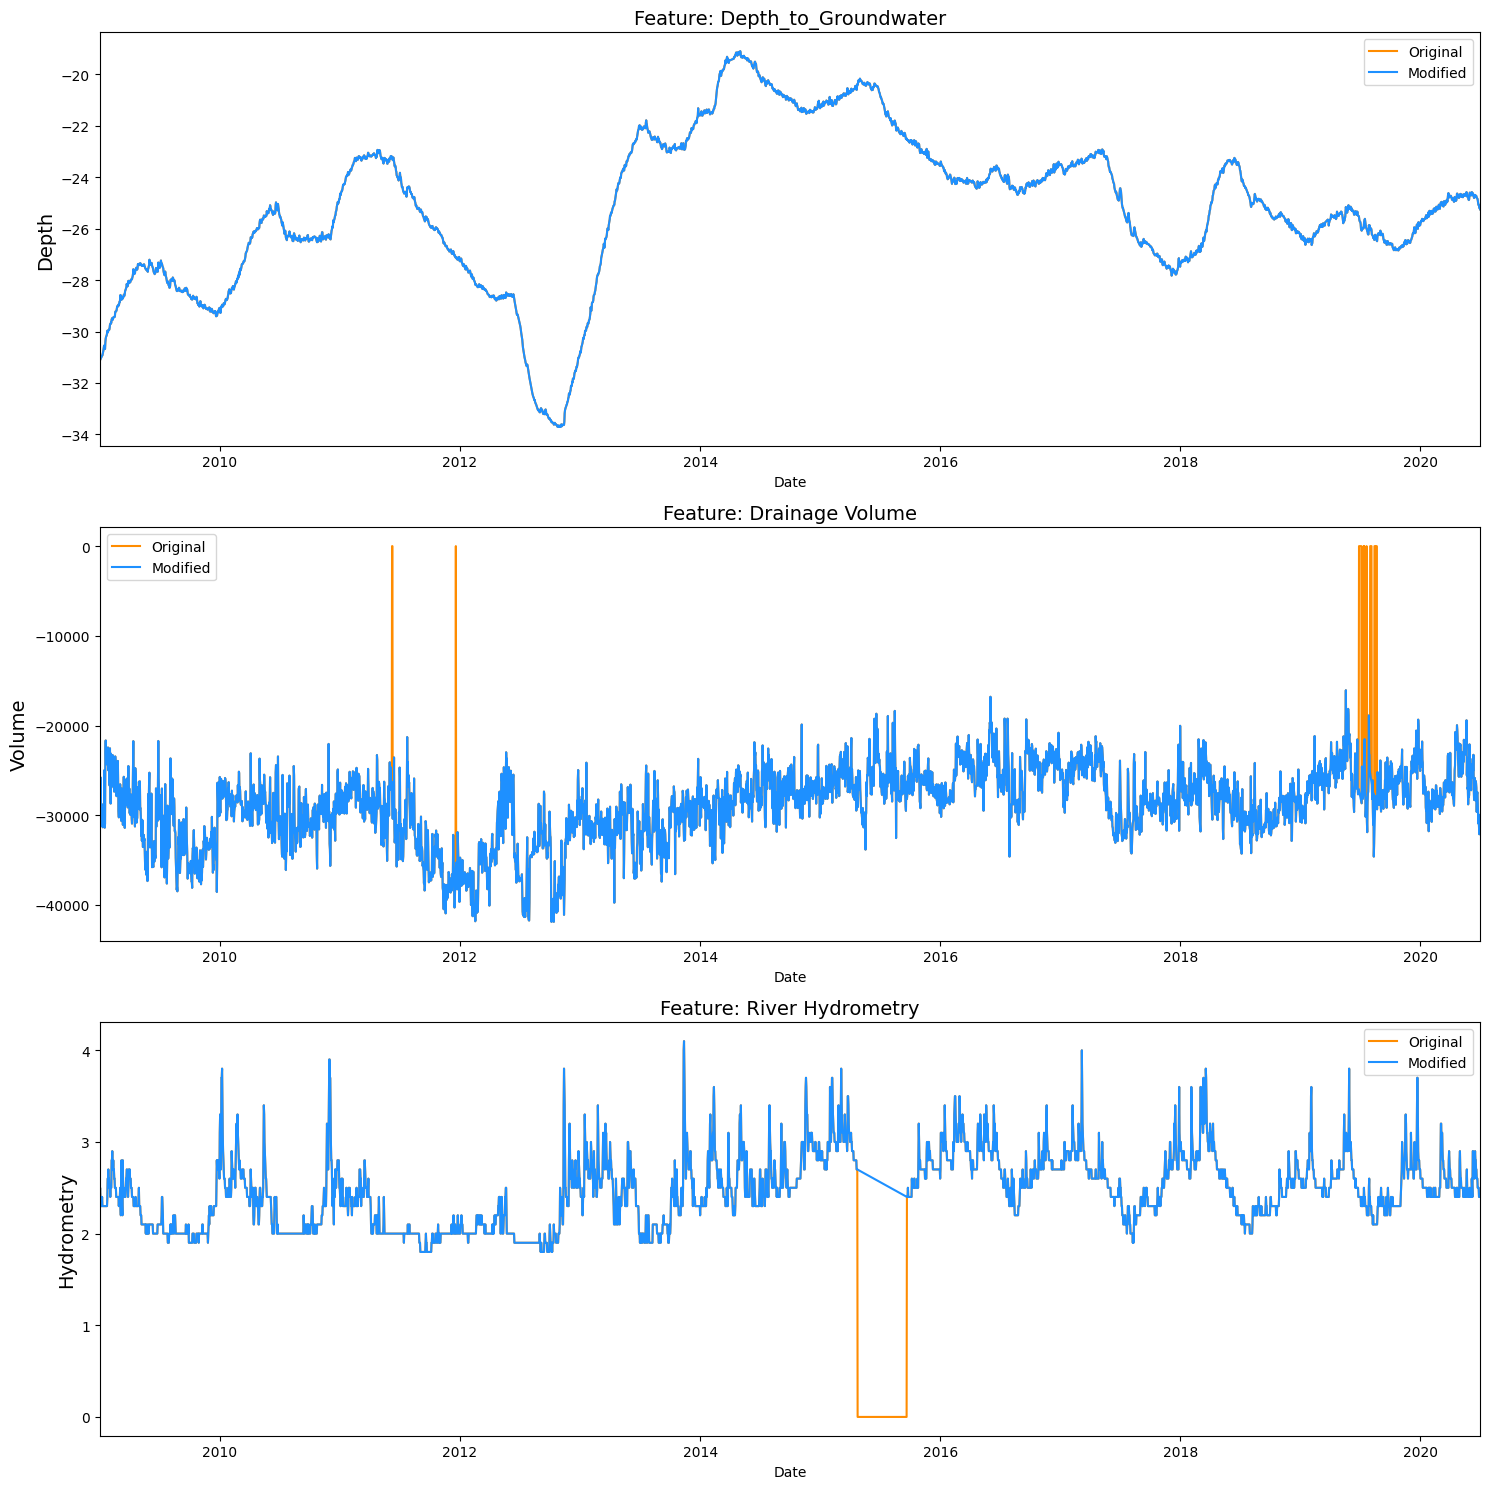

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Depth_to_Groundwater
old_depth_to_groundwater = df.Depth_to_Groundwater.copy()
# Thay thế giá trị 0 bằng NaN
df['Depth_to_Groundwater'] = np.where(df.Depth_to_Groundwater== 0, np.nan, df.Depth_to_Groundwater)

sns.lineplot(x=df.Date, y=old_depth_to_groundwater.fillna(np.inf), ax=ax[0], color='darkorange', label='Original')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.fillna(np.inf), ax=ax[0], color='dodgerblue', label='Modified')
ax[0].set_title('Feature: Depth_to_Groundwater', fontsize=14)
ax[0].set_ylabel('Depth', fontsize=14)

# Drainage_Volume
old_drainage_volume = df.Drainage_Volume.copy()
# Thay thế giá trị 0 bằng NaN
df['Drainage_Volume'] = np.where(df.Drainage_Volume == 0, np.nan, df.Drainage_Volume)

sns.lineplot(x=df.Date, y=old_drainage_volume.fillna(np.inf), ax=ax[1], color='darkorange', label='Original')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label='Modified')
ax[1].set_title('Feature: Drainage Volume', fontsize=14)
ax[1].set_ylabel('Volume', fontsize=14)

# River_Hydrometry
old_river_hydrometry = df.River_Hydrometry.copy()
# Thay thế giá trị 0 bằng NaN
df['River_Hydrometry'] = np.where(df.River_Hydrometry == 0, np.nan, df.River_Hydrometry)

sns.lineplot(x=df.Date, y=old_river_hydrometry.fillna(np.inf), ax=ax[2], color='darkorange', label='Original')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[2], color='dodgerblue', label='Modified')
ax[2].set_title('Feature: River Hydrometry', fontsize=14)
ax[2].set_ylabel('Hydrometry', fontsize=14)

for i in range(3):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

Giờ trực quan các giá trị `0` được thay thế bằng `null` và chuẩn bị các cách xử lý:

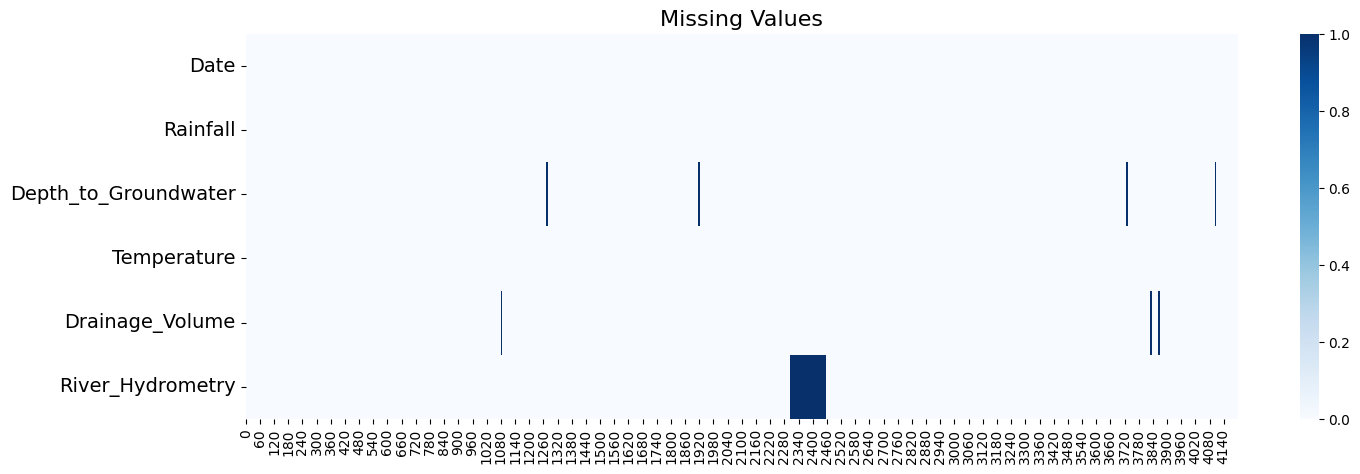

In [7]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14) 

plt.show()

**Nhóm đưa ra 4 phương án xử lý giá trị thiếu (NaN) trong dữ liệu, bây giờ hãy phân tích từng phương án:**

- **Phương án 1:** *Điền NaN bằng giá trị ngoại lệ hoặc bằng 0*
    - Cách làm: Thay thế tất cả các giá trị NaN bằng một giá trị được coi là ngoại lệ, chẳng hạn như -999, hoặc bằng 0.  
    $\rightarrow$ Phù hợp nếu giá trị NaN đại diện cho một quan sát bất thường, khác biệt đáng kể so với phần còn lại của dữ liệu.
    - Đánh giá với dữ liệu thiếu:
        - *Depth_to_Groundwater:* Không phù hợp do không có cơ sở nên điền giá trị thiếu bằng giá trị ngoại lệ hoặc 0 nên có thể làm sai lệch phân phối của dữ liệu.
        - *Drainge_Volume:* Không phù hợp do có các giá trị ngoại lệ lớn, việc điền NaN bằng giá trị ngoại lệ hoặc 0 sẽ làm sai lệch phân phối của dữ liệu.
        - *River_Hydrometry:* Không phù hợp do biến có xu hướng giảm dần theo thời gian, việc điền giá trị ngoại lệ hoặc 0 sẽ làm sai lệch xu hướng này.
    
- **Phương án 2:** *Điền NaN bằng giá trị trung bình*
    - Cách làm: Tính giá trị trung bình của các giá trị không thiếu trong cột dữ liệu, sau đó thay thế tất cả NaN bằng giá trị trung bình này.  
    $\rightarrow$ Phù hợp nếu số lượng giá trị thiếu nhỏ và không có giá trị ngoại lệ.
    - Đánh giá với dữ liệu thiếu:
        - *Depth_to_Groundwater:* Có thể phù hợp nếu giả định rằng các giá trị thiếu là ngẫu nhiên và không có xu hướng cụ thể, việc điền bằng giá trị trung bình có thể là một lựa chọn đơn giản và chấp nhận được.
        - *Drainge_Volume:* Có thể phù hợp vì phân bố của dữ liệu gần chuẩn và số lượng giá trị thiếu không nhiều, việc điền bằng giá trị trung bình có thể là một lựa chọn hợp lý.
        - *River_Hydrometry:* Không phù hợp do biến có phân phối lệch phải, việc điền giá trị trung bình sẽ làm sai lệch phân phối và xu hướng của dữ liệu.

- **Phương án 3:** *Điền NaN bằng giá trị cuối cùng với `.ffill()`*
    - Cách làm: Thay thế mỗi NaN bằng giá trị không thiếu gần nhất phía trước nó trong cùng cột dữ liệu.  
    $\rightarrow$ Phù hợp nếu dữ liệu có xu hướng theo thời gian và các giá trị thiếu không quá rải rác.
    - Đánh giá với dữ liệu thiếu:
        - *Depth_to_Groundwater:* Không phù hợp vì có sự biến động nhất định theo thời gian trong độ sâu mực nước ngầm nên việc điền bằng giá trị cuối cùng có thể không phản ánh đúng xu hướng thay đổi này.
        - *Drainge_Volume:* Không phù hợp do không có xu hướng rõ ràng theo thời gian, việc điền bằng giá trị cuối cùng có thể làm sai lệch dữ liệu.
        - *River_Hydrometry:* Không phù hợp do có một khoảng thời gian dài liên tục bị thiếu dữ liệu, việc điền bằng giá trị cuối cùng sẽ tạo ra một đường thẳng dài không phản ánh đúng xu hướng của dữ liệu.
        
- **Phương án 4:** *Điền NaN bằng giá trị nội suy tuyến tính với `.interpolate()`*
    - Cách làm: Ước tính giá trị thiếu bằng cách nội suy tuyến tính từ các giá trị không thiếu xung quanh.  
    $\rightarrow$ Phù hợp nếu dữ liệu có xu hướng tuyến tính và các giá trị thiếu không quá rải rác.
    - Đánh giá với dữ liệu thiếu:
        - *Depth_to_Groundwater:* Có thể phù hợp do các giá trị thiếu rải rác và không có khoảng thời gian dài liên tục bị thiếu, nội suy tuyến tính có thể là một lựa chọn tốt.
        - *Drainge_Volume:* Có thể phù hợp do các giá trị thiếu rải rác và không có khoảng thời gian dài liên tục bị thiếu, nội suy tuyến tính có thể tạo ra các giá trị hợp lý.
        - *River_Hydrometry:* Phù hợp do dữ liệu có `xu hướng tuyến tính` (giảm dần) và các giá trị thiếu nằm giữa các giá trị đã biết, nội suy tuyến tính có thể tạo ra các giá trị hợp lý và giữ được xu hướng của dữ liệu.

***Trực quan 4 phương án để chọn ra phương án tốt nhất:***

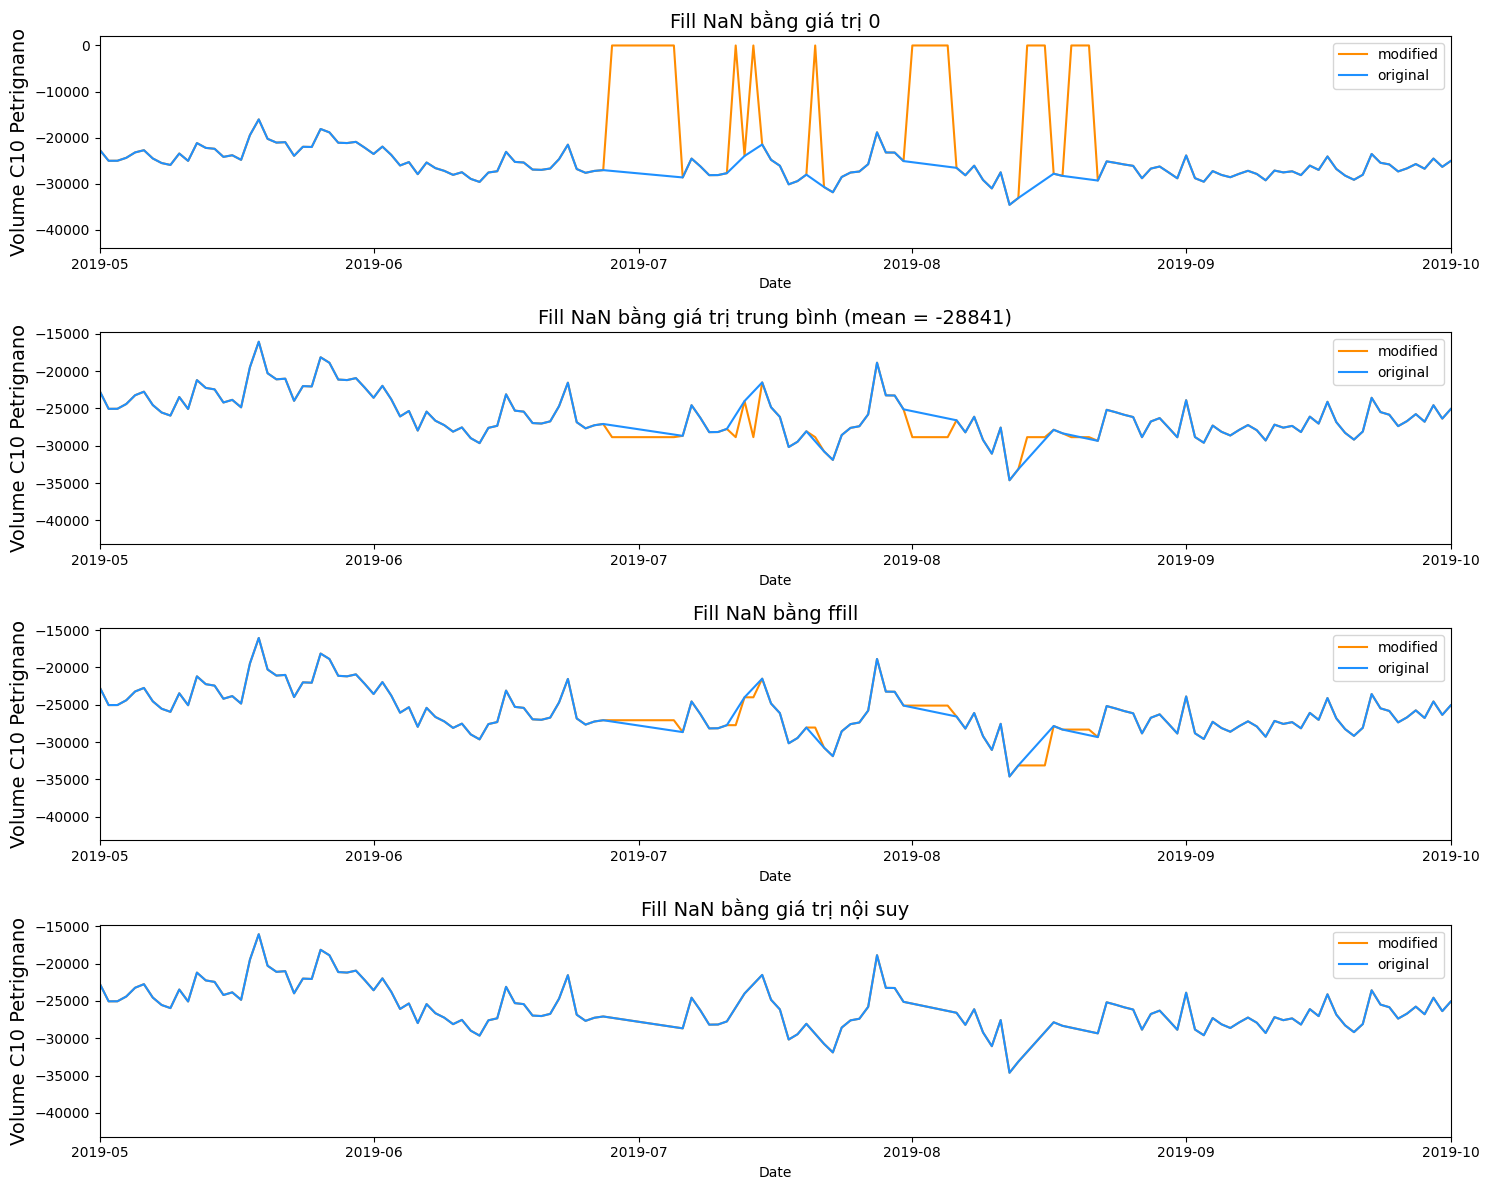

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

fill_methods = [
    ('Fill NaN bằng giá trị 0', 0),
    ('Fill NaN bằng giá trị trung bình', 'mean_interpolate'),  # Cải thiện phương pháp mean dùng thêm nội suy để cải thiện đồ thị
    ('Fill NaN bằng ffill', lambda x: x.ffill()),
    ('Fill NaN bằng giá trị nội suy', 'interpolate')
]

for ax, (title, method) in zip(axes, fill_methods):    
    filled_data = df.Drainage_Volume.copy()

    if method == 'mean_interpolate':
        mean_val = df.Drainage_Volume.mean()
        filled_data = filled_data.fillna(mean_val).interpolate()  # Nội suy sau khi điền giá trị trung bình
        title += f' (mean = {mean_val:.0f})'
    elif callable(method):
        filled_data = method(filled_data)
    elif method == 'interpolate':
        filled_data = filled_data.interpolate()
    else:
        filled_data = filled_data.fillna(method)

    sns.lineplot(x=df.Date, y=filled_data, ax=ax, color='darkorange', label='modified')
    sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax, color='dodgerblue', label='original')

    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Volume C10 Petrignano', fontsize=14)
    ax.set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    ax.legend()

plt.tight_layout()
plt.show()

Dựa theo đồ thị trực quan: Cách tốt nhất là ***Phương án nội suy tuyến tính***. 
- Các khoảng trống đã được lấp đầy một cách mượt mà, tạo thành một đường liên tục.
- Đường màu cam (modified) đi qua các điểm dữ liệu gốc một cách hợp lý và không có dấu hiệu của sự ngoại suy quá mức hoặc không phù hợp với xu hướng chung của dữ liệu.

***Sử dụng phương án nội suy tuyến tính lên các giá trị thiếu:***

In [9]:
df['Drainage_Volume'] = df['Drainage_Volume'].interpolate()
df['River_Hydrometry'] = df['River_Hydrometry'].interpolate()
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()

### 3. Smoothing data/Resampling - Làm mịn dữ liệu với lấy mẫu lại

**Resampling (Lấy mẫu lại)** là một kỹ thuật quan trọng trong phân tích dữ liệu chuỗi thời gian, có thể cung cấp thêm thông tin về dữ liệu. Có hai loại resampling:

***1. Upsampling (Lấy mẫu lên):***
- *Ý tưởng:* Tăng tần suất lấy mẫu của dữ liệu. Ví dụ, chuyển từ dữ liệu ngày sang dữ liệu giờ, hoặc từ dữ liệu tháng sang dữ liệu ngày.
- *Phù hợp với:*
    - Dữ liệu chuỗi thời gian có tần số lấy mẫu thấp.
    - Dữ liệu có các biến động nhỏ nhưng quan trọng.

***2. Downsampling (Lấy mẫu xuống):***
- *Ý tưởng:* Giảm tần suất lấy mẫu của dữ liệu. Ví dụ, chuyển từ dữ liệu ngày sang dữ liệu tuần, hoặc từ dữ liệu giờ sang dữ liệu ngày.
- *Phù hợp với:*
    - Dữ liệu chuỗi thời gian có tần số lấy mẫu cao.
    - Dữ liệu có nhiều nhiễu.

📌 Dựa trên việc dữ liệu kéo dài nhiều năm, `Downsampling `là một lựa chọn hợp lý để tổng hợp thông tin và giảm nhiễu. 

- Tuy nhiên, việc lựa chọn giữa ba phương án downsampling (ngày, tuần, tháng) sẽ phụ thuộc vào mục tiêu phân tích cụ thể và đặc điểm của dữ liệu.

    - **Theo ngày ('D'):** Giữ lại nhiều chi tiết nhất, dùng khi cần phân tích các biến động ngắn hạn.

    - **Theo tuần ('W'):** Giảm nhiễu đáng kể, giữ lại các xu hướng chung theo tuần, dùng khi cần phân tích các biến động trung và dài hạn.

    - **Theo tháng ('M'):** Giảm nhiễu nhiều nhất, cho phép tập trung vào các xu hướng dài hạn, dùng khi cần phân tích các biến động rất dài hạn.

$\rightarrow$ Chọn giữa tuần hoặc tháng tuy nhiên sẽ trực quan cả 3 để có cái nhìn tổng quát nhất.

***Trực quan để chọn phương án tốt nhất:***
Lựa chọn 2 yếu tố là `Drainage_Volume` và `Temperature` vì:
- *Đại diện:* Việc chọn 2 thuộc tính này giúp minh họa cách resampling có thể được áp dụng cho các loại dữ liệu khác nhau.
    - `Drainage_Volume` có thể là dữ liệu liên tục hoặc rời rạc.
    - `Temperature` là dữ liệu liên tục.
- *Liên quan:* 2 thuộc tính này liên quan đến nhau. 
    - Nhiệt độ cao có thể làm tăng sự bốc hơi, dẫn đến giảm lượng thoát nước. 
    - Ngược lại, nhiệt độ thấp có thể làm giảm sự bốc hơi, dẫn đến tăng lượng thoát nước. 
    - Việc resampling cả hai thuộc tính này cho phép phân tích mối quan hệ giữa chúng ở các tần suất thời gian khác nhau.

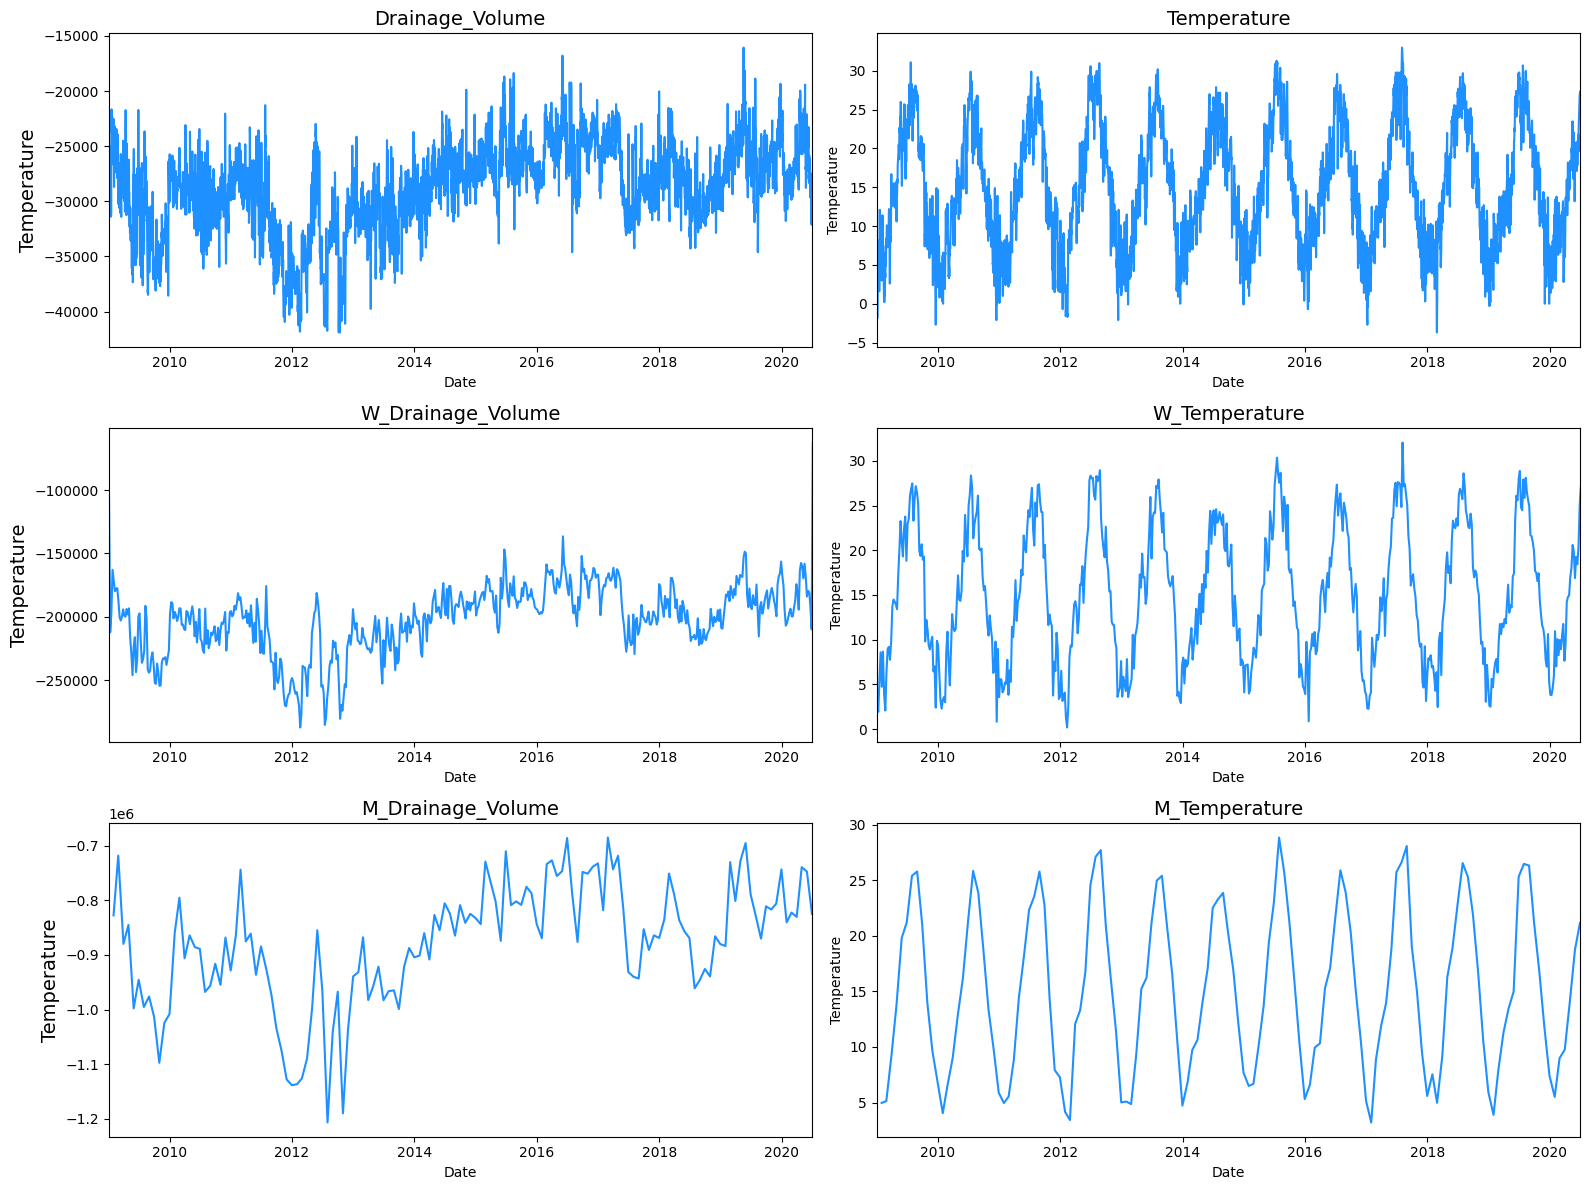

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

for i, (column, agg_func) in enumerate([('Drainage_Volume', 'sum'), ('Temperature', 'mean')]):
    for j, rule in enumerate(['D', 'W', 'M']):  # Thay đổi tần suất lấy mẫu
        ax = axes[j, i]
        resampled_df = df[['Date', column]].resample(rule, on='Date').agg(agg_func).reset_index()
        sns.lineplot(x='Date', y=column, data=resampled_df, ax=ax, color='dodgerblue')

        title = f'{rule.upper()}_{column}' if rule != 'D' else column
        ax.set_title(title, fontsize=14)
        ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

        if i == 0:
            ylabel = 'Volume C10 Petrignano' if column == 'Drainage_volume' else 'Temperature'
            ax.set_ylabel(ylabel, fontsize=14)

plt.tight_layout()
plt.show()

Dựa theo đồ thị trực quan: Cách tốt nhất là Resampling ***theo Tuần***. 
- Cách này sẽ giúp việc phân tích trở nên dễ dàng và ít mất dữ liệu hơn.

In [11]:
df_downsampled = df[['Date',
                     'Depth_to_Groundwater', 
                     'Temperature',
                     'Drainage_Volume', 
                     'River_Hydrometry'
                    ]].resample('7D', on='Date').mean().reset_index(drop=False)

df_downsampled['Rainfall'] = df[['Date',
                                 'Rainfall'
                                ]].resample('7D', on='Date').sum().reset_index(drop=False)[['Rainfall']]

df = df_downsampled

**Lý do tách cột Rainfall:**
- Các cột `Depth_to_Groundwater`, `Temperature`, `Drainage_Volume` và `River_Hydrometry` là các đại lượng đo lường liên tục, thể hiện mức độ hoặc giá trị tại một thời điểm cụ thể. Khi downsample theo tuần, việc `tính trung bình` của các giá trị này trong tuần là một cách hợp lý để đại diện cho xu hướng chung trong khoảng thời gian đó.

- Cột `Rainfall` là dữ liệu tích lũy, thể hiện tổng lượng mưa trong một khoảng thời gian. Khi downsample theo tuần, việc `tính tổng` lượng mưa trong tuần sẽ cung cấp thông tin chính xác hơn về lượng mưa thực tế xảy ra trong khoảng thời gian đó.

### 4. Stationarity - Kiểm tra Tính Dừng

Một chuỗi thời gian được coi là `Stationarity - Dừng` khi các thuộc tính thống kê của nó (như giá trị trung bình, phương sai, và hiệp phương sai) không thay đổi theo thời gian.   

$\rightarrow$ Điều này có nghĩa là chuỗi thời gian không có xu hướng (trend) hoặc tính mùa vụ (seasonality) rõ ràng.

***Các điều kiện:***   

Để một chuỗi thời gian được coi là dừng, nó cần thỏa mãn ba điều kiện sau:
- *Giá trị trung bình không đổi theo thời gian:* Trung bình của chuỗi thời gian không tăng hoặc giảm theo thời gian.

- *Phương sai không đổi theo thời gian:* Sự biến động (đo bằng phương sai) của chuỗi thời gian không thay đổi theo thời gian.

- *Hiệp phương sai không đổi theo thời gian:* Mối quan hệ giữa các quan sát ở các thời điểm khác nhau (đo bằng hiệp phương sai) không thay đổi theo thời gian.

📌 ***Tại sao tính dừng lại quan trọng?***

**Stationarity - Tính dừng** là một giả định quan trọng trong nhiều mô hình chuỗi thời gian, đặc biệt là các mô hình như `ARIMA` (Autoregressive Integrated Moving Average). Nếu dữ liệu không dừng, các mô hình này có thể đưa ra dự báo không chính xác.

**Có ba phương pháp chính để kiểm tra tính dừng của một chuỗi thời gian:**
- *Kiểm tra bằng trực quan:* Vẽ biểu đồ chuỗi thời gian và quan sát xem có xu hướng (trend) hoặc tính mùa vụ (seasonality) không. Nếu có, chuỗi thời gian không dừng.

- *Kiểm tra bằng thống kê cơ bản:* Chia chuỗi thời gian thành các phần nhỏ hơn và so sánh giá trị trung bình và phương sai của từng phần. Nếu có sự khác biệt đáng kể, chuỗi thời gian không dừng.

- *Kiểm tra bằng phương pháp thống kê (Statistical test):* Sử dụng các kiểm định thống kê như Augmented Dickey-Fuller (ADF) test để kiểm tra giả thuyết về tính dừng.

#### 4.1. Trực quan 

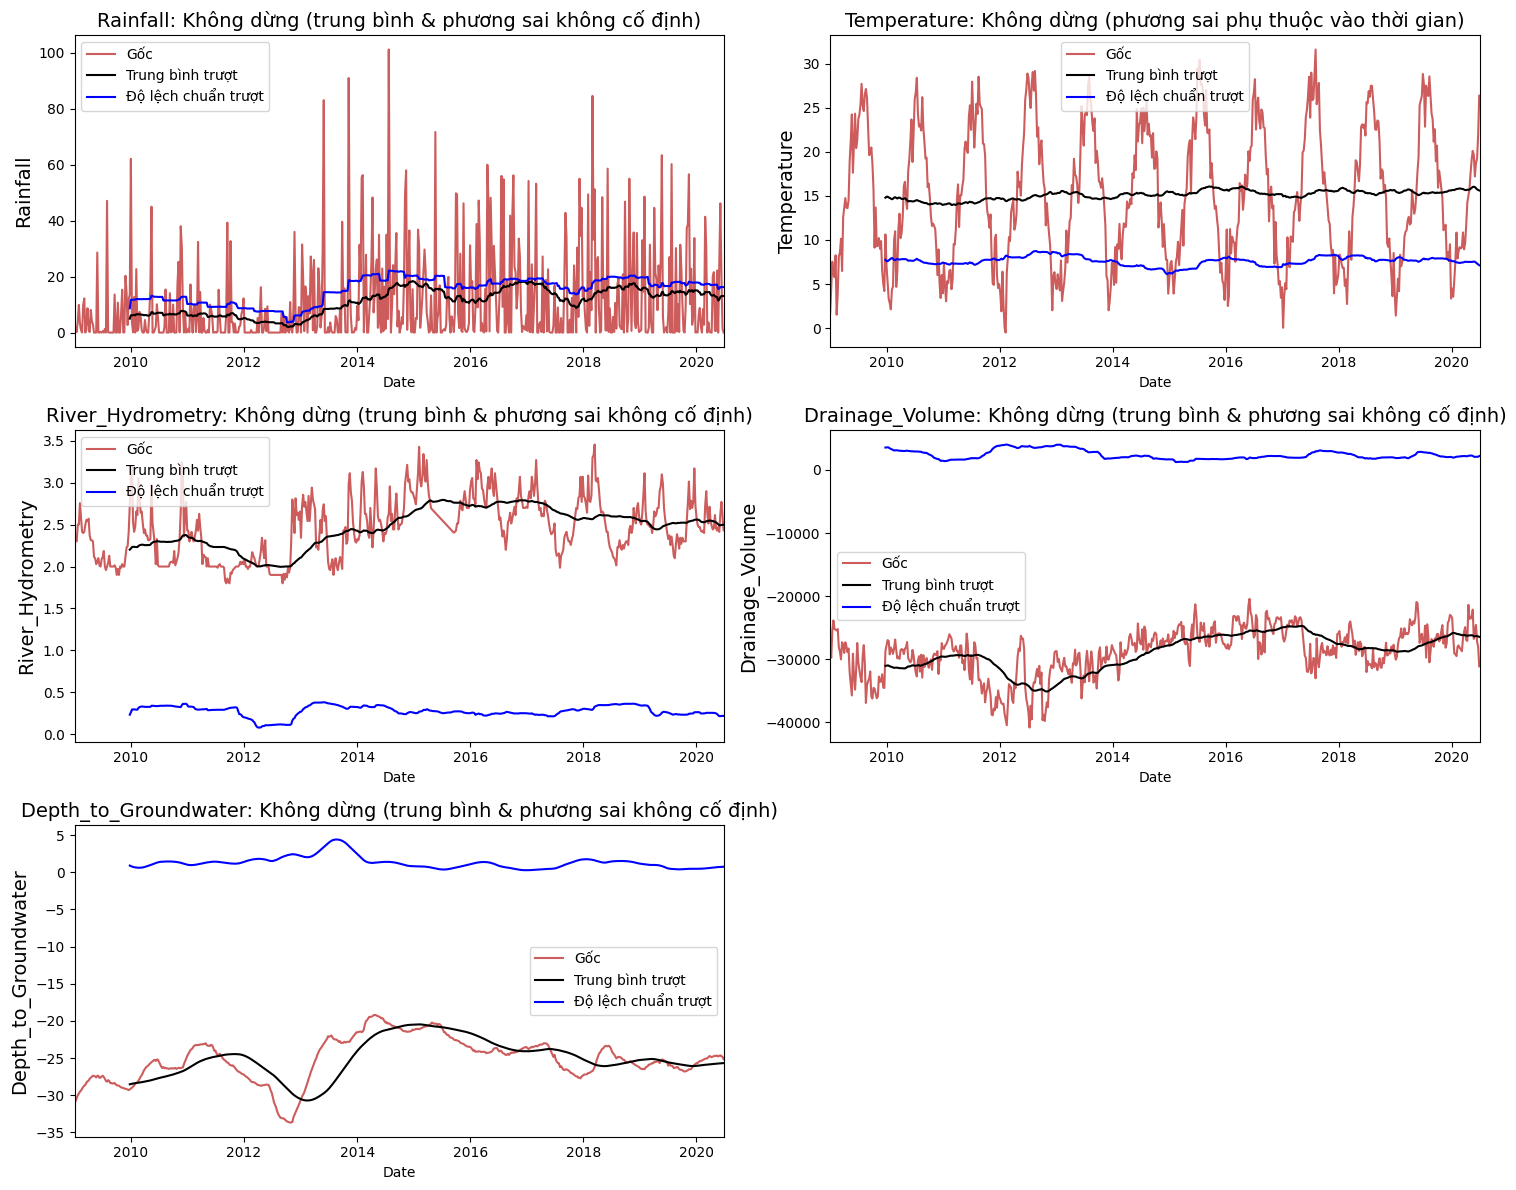

In [12]:
rolling_window = 52 # Giá trị trung bình trượt sử dụng cho biểu đồ
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

columns_and_titles = [
    ('Rainfall', 'Rainfall: Không dừng (trung bình & phương sai không cố định)'),
    ('Temperature', 'Temperature: Không dừng (phương sai phụ thuộc vào thời gian)'),
    ('River_Hydrometry', 'River_Hydrometry: Không dừng (trung bình & phương sai không cố định)'),
    ('Drainage_Volume', 'Drainage_Volume: Không dừng (trung bình & phương sai không cố định)'),
    ('Depth_to_Groundwater', 'Depth_to_Groundwater: Không dừng (trung bình & phương sai không cố định)')
]

for i, (column, title) in enumerate(columns_and_titles):
    row = i // 2
    col = i % 2
    
    sns.lineplot(x=df.Date, y=df[column], ax=axes[row, col], color='indianred', label='Gốc')
    
    # Tính trung bình và độ lệch chuẩn trượt
    rolling_mean = df[column].rolling(rolling_window).mean()
    rolling_std = df[column].rolling(rolling_window).std()

    sns.lineplot(x=df.Date, y=rolling_mean, ax=axes[row, col], color='black', label='Trung bình trượt')
    sns.lineplot(x=df.Date, y=rolling_std, ax=axes[row, col], color='blue', label='Độ lệch chuẩn trượt')
    
    axes[row, col].set_title(title, fontsize=14)
    axes[row, col].set_ylabel(ylabel=column, fontsize=14)
    axes[row, col].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    axes[row, col].legend()


fig.delaxes(axes[2, 1]) 

plt.tight_layout()
plt.show()


**Nhận xét:**
- *Rainfall:*
    - Có tính biến động cao, với nhiều đỉnh và đáy nhọn.
    - Trung bình trượt và độ lệch chuẩn trượt cũng biến động mạnh theo thời gian, cho thấy cả trung bình và phương sai của lượng mưa đều không cố định.
    - Có thể có một số yếu tố mùa vụ, nhưng không rõ ràng.

- *River_Hydrometry:*
    - Có xu hướng giảm dần theo thời gian, thể hiện bằng đường trung bình trượt dốc xuống.
    - Phương sai có vẻ khá ổn định, nhưng cũng có một số biến động nhỏ theo thời gian.

- *Temperature:*
    - Thể hiện tính mùa vụ rõ ràng, với nhiệt độ cao hơn vào mùa hè và thấp hơn vào mùa đông.
    - Trung bình trượt dao động theo mùa, trong khi độ lệch chuẩn trượt tương đối ổn định.

- *Drainage_Volume:*
    - Có xu hướng giảm dần theo thời gian, tương tự như thủy văn.
    - Phương sai có vẻ không ổn định, với một số biến động lớn theo thời gian.

- *River_Hydrometry:*
    - Có xu hướng giảm dần theo thời gian.
    - Phương sai có vẻ khá ổn định, nhưng cũng có một số biến động nhỏ theo thời gian.

$\rightarrow$  **Kết luận:** Tất cả các thuộc tính trong dữ liệu đều không có tính dừng và có các dạng khác nhau. `Rainfall` và `Drainage_Volume` có cả trung bình và phương sai không cố định. `River_Hydrometry `và `River_Hydrometry` có trung bình không cố định nhưng phương sai khá ổn định. `Temperature` có phương sai không cố định do tính mùa vụ.

#### 4.2. Thống kê cơ bản

Dữ liệu được chia làm `2 phần` để thực hiện thống kê với mục đích:
- *Kiểm tra tính ổn định theo thời gian.*

- *Phân tích sự thay đổi.*

- *So sánh mẫu.*

In [13]:
num_partitions = 2
partition_length = int(len(df) / num_partitions)

# Chỉ lấy các cột số để tránh Datetime của Date
numeric_cols = df.select_dtypes(include=np.number).columns

partition1_mean = df.head(partition_length)[numeric_cols].mean()
partition1_var = df.head(partition_length)[numeric_cols].var()
partition2_mean = df.tail(partition_length)[numeric_cols].mean()
partition2_var = df.tail(partition_length)[numeric_cols].var()

In [14]:
stationarity_test = pd.concat([partition1_mean, partition2_mean, partition1_var, partition2_var], axis=1)
stationarity_test.columns = ['Partition 1 Mean', 'Partition 2 Mean', 'Partition 1 Variance', 'Partition 2 Variance']

def highlight_greater(x):
    temp = x.copy().round(0).astype(int)
    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    
    cols = ['Mean', 'Variance']
    conditions = {
        'Mean': (temp['Partition 1 Mean'] == temp['Partition 2 Mean']),
        'Variance': (temp['Partition 1 Variance'] == temp['Partition 2 Variance'])
    }
    ranges = {
        'Mean': (temp['Partition 1 Mean'] < temp['Partition 2 Mean']+3) & (temp['Partition 1 Mean'] > temp['Partition 2 Mean']-3),
        'Variance': (temp['Partition 1 Variance'] < temp['Partition 2 Variance']+3) & (temp['Partition 1 Variance'] > temp['Partition 2 Variance']-3)
    }

    for col in cols:
        for part in ['Partition 1', 'Partition 2']:
            df1[f'{part} {col}'] = np.where(~conditions[col], 'background-color: salmon', df1[f'{part} {col}'])
            df1[f'{part} {col}'] = np.where(ranges[col], 'background-color: gold', df1[f'{part} {col}'])
            df1[f'{part} {col}'] = np.where(conditions[col], 'background-color: mediumseagreen', df1[f'{part} {col}'])

    return df1

stationarity_test.style.apply(highlight_greater, axis=None).format("{:20,.0f}")


,Partition 1 Mean,Partition 2 Mean,Partition 1 Variance,Partition 2 Variance
Depth_to_Groundwater,-26,-24,13,4
Temperature,15,15,58,56
Drainage_Volume,"-30,989","-26,684","12,053,921","5,955,484"
River_Hydrometry,2,3,0,0
Rainfall,8,14,197,306


> **Chú thích:**
> - Màu xanh lá cây: Giá trị trung bình hoặc phương sai của hai phần bằng nhau.
> - Màu vàng: Giá trị trung bình hoặc phương sai của hai phần khác nhau nhưng nằm trong khoảng cho phép (+/- 3).
> - Màu hồng: Giá trị trung bình hoặc phương sai của hai phần khác nhau vượt quá khoảng cho phép.

**Nhận xét:**
- *Depth_to_Groundwater:*
    - Giá trị trung bình ở `Partition 1 (-26) `thấp hơn so với `Partition 2 (-24)`, cho thấy mực nước ngầm ở `Partition 1` sâu hơn.
    - Phương sai ở `Partition 1 (13)` cao hơn `Partition 2 (4)`, cho thấy độ sâu mực nước ngầm ở `Partition 1` biến động nhiều hơn.

- *Temperature:*
    - Giá trị trung bình giữa hai phân vùng là như nhau `(15)`, cho thấy không có sự khác biệt về nhiệt độ trung bình.
    - Phương sai ở cả hai phân vùng tương đối cao và gần bằng nhau `(58 và 56)`, cho thấy nhiệt độ ở cả hai nơi đều biến động mạnh.

- *Drainage_Volume:*
    - Giá trị trung bình ở `Partition 1 (-30,989)` thấp hơn so với `Partition 2 (-26,684)`, cho thấy khối lượng thoát nước trung bình ở `Partition 1` lớn hơn.
    - Phương sai ở `Partition 1 (12,053,921)` cao hơn rất nhiều so với `Partition 2 (5,955,484)`, cho thấy khối lượng thoát nước ở `Partition 1` biến động rất mạnh.

- *River_Hydrometry:*
    - Giá trị trung bình ở `Partition 1 (2)` thấp hơn so với `Partition 2 (3)`.
    - Phương sai bằng `0` ở cả hai phân vùng, cho thấy không có sự biến động về thủy lượng sông.

- *Rainfall:*
    - Giá trị trung bình ở `Partition 1 (8)` thấp hơn so với `Partition 2 (14)`, cho thấy lượng mưa trung bình ở `Partition 1` thấp hơn.
    - Phương sai ở `Partition 2 (306)` cao hơn so với `Partition 1 (197)`, cho thấy lượng mưa ở `Partition 2` biến động mạnh hơn.

$\longrightarrow$ **Nhận xét chung:**  
- Có sự khác biệt đáng kể giữa hai phân vùng về `Depth_to_Groundwate`, Drainage_Volume và `Rainfall`.

- `Temperature` trung bình giữa hai phân vùng là như nhau, nhưng có sự biến động lớn.

- `River_Hydrometry` có sự khác biệt nhỏ giữa hai phân vùng và không có sự biến động.

***Trực quan để chắc chắn dữ liệu tuân theo phân bố Gaussian (phân bố hình chuông) trong trường hợp dữ liệu dừng.***

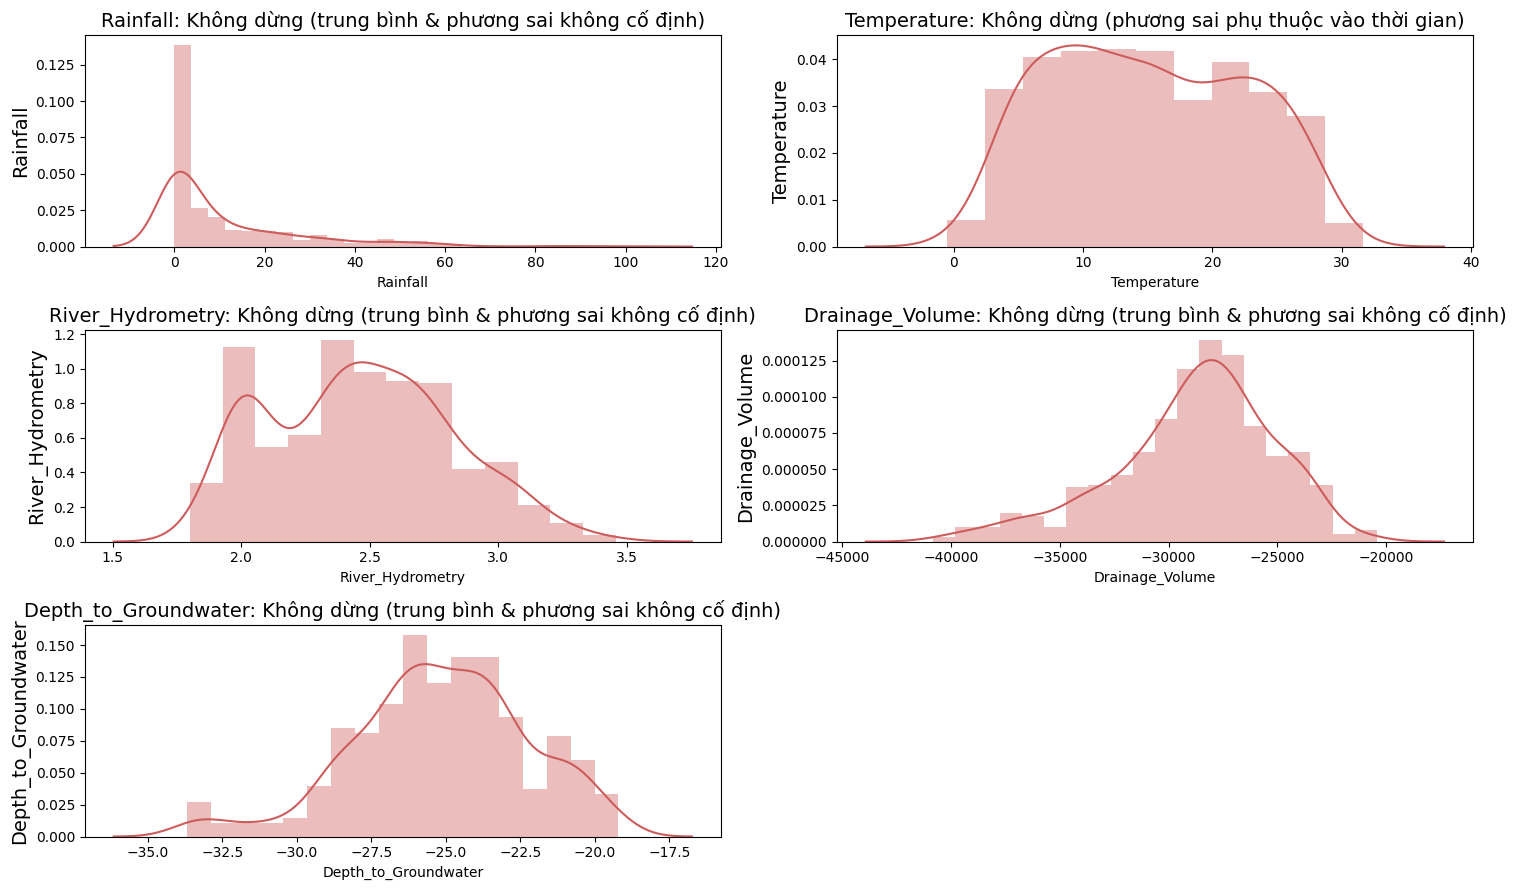

In [15]:
plot_params = [
    ('Rainfall', 'Rainfall: Không dừng (trung bình & phương sai không cố định)', 'Rainfall'),
    ('Temperature', 'Temperature: Không dừng (phương sai phụ thuộc vào thời gian)', 'Temperature'),
    ('River_Hydrometry', 'River_Hydrometry: Không dừng (trung bình & phương sai không cố định)', 'River_Hydrometry'),
    ('Drainage_Volume', 'Drainage_Volume: Không dừng (trung bình & phương sai không cố định)', 'Drainage_Volume'),
    ('Depth_to_Groundwater', 'Depth_to_Groundwater: Không dừng (trung bình & phương sai không cố định)', 'Depth_to_Groundwater')
]

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

for i, (column, title, ylabel) in enumerate(plot_params):
    row, col = divmod(i, 2)
    sns.distplot(df[column].fillna(np.inf), ax=ax[row, col], color='indianred')
    ax[row, col].set_title(title, fontsize=14)
    ax[row, col].set_ylabel(ylabel=ylabel, fontsize=14)

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

**Nhận xét chung:**
- Các thuộc tính `Temperature` và `Depth_to_Groundwater` có xu hướng gần với phân bố Gaussian hơn, cho thấy tính dừng tốt hơn.

- Các thuộc tính `Rainfall` và `River_Hydrometry` có sự phân bố không đối xứng và không tuân theo phân bố Gaussian, cho thấy tính không dừng rõ rệt.

- Thuộc tính `Drainage_Volume` có xu hướng gần với phân bố Gaussian nhưng vẫn có một số biến động nhỏ.

#### 4.3. Augmented Dickey-Fuller (ADF) - Kiểm định Dickey-Fuller mở rộng 

📌 ***Unit Root Test***
- **Unit Root Test** là một đặc tính của chuỗi thời gian cho biết nó không dừng (non-stationary). 
- Phương trình biểu diễn một mô hình tự hồi quy (autoregressive model - AR) bậc 1, thường được ký hiệu là `AR(1)`:
$$
Yt = \alpha Y_{t-1} + \beta X_e + \epsilon
$$

> trong đó:
> - Y_{t-1} là giá trị của chuỗi thời gian tại thời điểm t-1
> - $\alpha$ là hệ số của số hạng trễ Y_{t-1} 
> - X_e đại diện cho các biến ngoại sinh (nếu có)
> - $\beta$ là hệ số của (các) biến ngoại sinh
> - $\epsilon$ là số hạng sai số (nhiễu trắng)

Khi $\alpha = 1$, phương trình này cho biết sự hiện diện của Unit Root Test (nghiệm đơn vị) , có nghĩa là chuỗi thời gian không dừng.

📌 **Kiểm định Dickey-Fuller mở rộng (Augmented Dickey-Fuller - ADF)** là một trong những **Unit Root Test** được sử dụng phổ biến nhất. Nghiệm đơn vị là nguyên nhân gây ra `tính không dừng (non-stationarity)`.

- *Giả thuyết null (H0)*: Chuỗi thời gian có nghiệm đơn vị (không có tính dừng).

- *Giả thuyết thay thế (H1)*: Chuỗi thời gian không có nghiệm đơn vị (có tính dừng).

$\rightarrow$ Nếu giả thuyết null có thể bị bác bỏ, chúng ta có thể kết luận rằng chuỗi thời gian có tính dừng.

***Có hai cách để bác bỏ giả thuyết null:***

**1. Giả thuyết null có thể bị bác bỏ nếu giá trị p (p-value) nhỏ hơn một mức ý nghĩa đã đặt. Mức ý nghĩa mặc định là 5%.**
- `p-value` > `mức ý nghĩa (mặc định: 0.05)`: Không thể bác bỏ giả thuyết null `(H0)`, dữ liệu có nghiệm đơn vị và không có tính dừng.
- `p-value `<= `mức ý nghĩa (mặc định: 0.05)`: Bác bỏ giả thuyết null `(H0)`, dữ liệu không có nghiệm đơn vị và dừng.

**2. Giả thuyết null có thể bị bác bỏ nếu thống kê kiểm định (test statistic) nhỏ hơn giá trị tới hạn (critical value).**
- `Thống kê ADF` > `giá trị tới hạn`: Không thể bác bỏ giả thuyết null `(H0)`, dữ liệu có nghiệm đơn vị và không dừng.
- `Thống kê ADF` < `giá trị tới hạn`: Bác bỏ giả thuyết null `(H0)`, dữ liệu không có nghiệm đơn vị và dừng.

$\rightarrow$ **Tóm lại:** Kiểm định ADF giúp chúng ta xác định xem một chuỗi thời gian có tính dừng hay không. 

> Sử dụng kiểm định Dickey-Fuller mở rộng https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

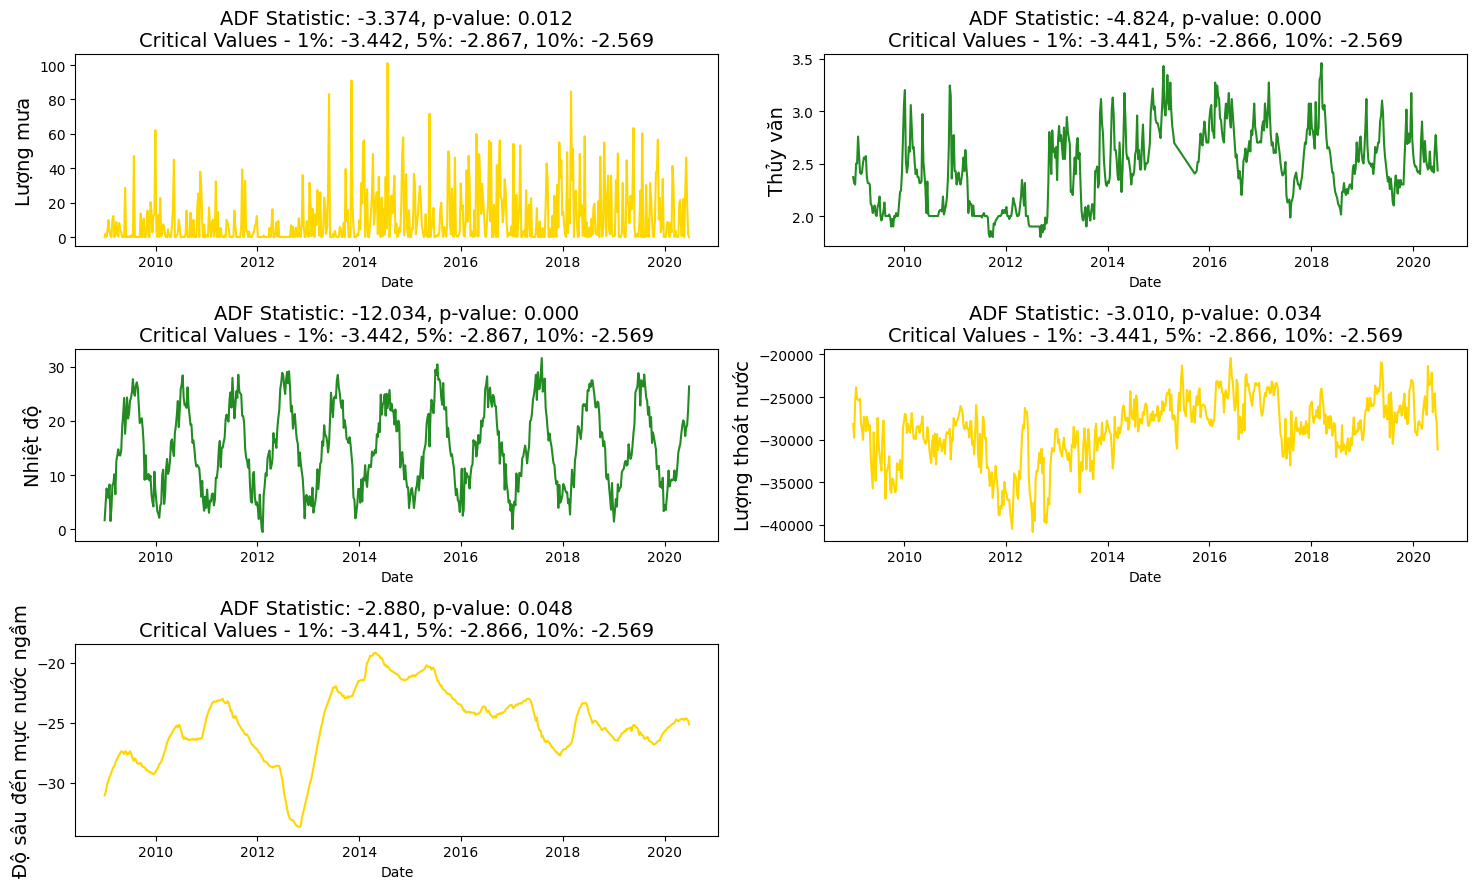

In [16]:
from statsmodels.tsa.stattools import adfuller

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    adf_stat, p_val, _, _, crit_vals, _ = result

    significance_level = 0.05
    crit_val_1, crit_val_5, crit_val_10 = crit_vals['1%'], crit_vals['5%'], crit_vals['10%']

    if p_val < significance_level:
        if adf_stat < crit_val_1:
            linecolor = 'forestgreen'
        elif adf_stat < crit_val_5:
            linecolor = 'gold'
        elif adf_stat < crit_val_10:
            linecolor = 'orange'
        else:
            linecolor = 'indianred'
    else:
        linecolor = 'indianred'

    sns.lineplot(x=df.Date, y=series, ax=ax, color=linecolor)
    ax.set_title(
        f'ADF Statistic: {adf_stat:0.3f}, p-value: {p_val:0.3f}\n'
        f'Critical Values - 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}',
        fontsize=14
    )
    ax.set_ylabel(ylabel=title, fontsize=14)

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

plot_params = [
    ('Rainfall', 'Lượng mưa', ax[0, 0]),
    ('Temperature', 'Nhiệt độ', ax[1, 0]),
    ('River_Hydrometry', 'Thủy văn', ax[0, 1]),
    ('Drainage_Volume', 'Lượng thoát nước', ax[1, 1]),
    ('Depth_to_Groundwater', 'Độ sâu đến mực nước ngầm', ax[2, 0])
]

for column, title, axis in plot_params:
    visualize_adfuller_results(df[column].values, title, axis)

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()


>**Chú thích:**
>- Màu xanh lá cây: `adf_stat` $<$ `1%` 
>- Màu vàng: `adf_stat` $<$ `5%` 
>- Màu cam: `adf_stat` $<$ `11%` 
>- Màu đỏ: `adf_stat` $\geq$ `10%` hoặc `p_valua` $\geq$ `mức ý nghĩa`

**Nhận xét:**
- *Rainfall:* Thuộc tính này có bằng chứng dừng với `mức tin cậy 95%`. Giá trị ADF và giá trị p đều cho thấy chúng ta có thể bác bỏ giả thuyết không về không dừng (non-stationarity). Tuy nhiên, mức độ tin cậy không đạt đến 99%.

- *River Hydrometry:* Thuộc tính này có bằng chứng rất mạnh về tính dừng với `mức tin cậy 99%`. Giá trị ADF rất nhỏ và giá trị p rất thấp cho thấy tính dừng của chuỗi thời gian này là rất đáng tin cậy.

- *Temperature:* Thuộc tính này cũng có bằng chứng rất mạnh về tính dừng với `mức tin cậy 99%`. Giá trị ADF và giá trị p đều cho thấy tính dừng của chuỗi thời gian này là rất cao.

- *Drainage Volume:* Thuộc tính này có bằng chứng dừng với `mức tin cậy 95%`. Giá trị ADF và giá trị p đều chỉ ra rằng chúng ta có thể bác bỏ giả thuyết không về không dừng, nhưng mức độ tin cậy không đạt đến 99%.

- *Depth to Groundwater:* Thuộc tính này có bằng chứng dừng với `mức tin cậy 95%`. Giá trị ADF và giá trị p cho thấy chúng ta có thể bác bỏ giả thuyết không về không dừng với mức độ tin cậy tương đối cao, nhưng không đạt đến 99%.

$\rightarrow$ **Tóm lại:**
- Các thuộc tính `River_Hydrometry` và `Temperature` có bằng chứng mạnh nhất về tính dừng với `mức tin cậy 99%`.

- Các thuộc tính `Rainfall`, `Drainage_Volume`, và `Depth_to_Groundwater` có bằng chứng về tính dừng với `mức tin cậy 90% đến 95%`.

- Tính dừng của các chuỗi thời gian này cho thấy rằng chúng có thể phù hợp để sử dụng trong các mô hình dự báo yêu cầu dữ liệu dừng như ARIMA, sau khi áp dụng các phương pháp biến đổi thích hợp nếu cần.

📌 ***Hai phương pháp phổ biến nhất để đạt được tính ổn định (tính dừng) cho chuỗi thời gian là:***

- **Transformation:**
    - *Log Transformation*: Lấy logarit của các giá trị chuỗi thời gian để làm mượt dữ liệu và giảm biến động. Phương pháp này thường được sử dụng khi dữ liệu có sự biến thiên lớn hoặc xu hướng tăng trưởng theo thời gian.
        - Công thức: $y'_t = log(y_t)$

    - *Square Root Transformation:* Lấy căn bậc hai của các giá trị chuỗi thời gian để giảm sự biến động của dữ liệu, đặc biệt là khi dữ liệu có sự phân bố không đồng nhất.
        - Công thức: $y'_t = \sqrt{y_t}$

    - *Box-Cox Transformation:* Là một phương pháp biến đổi linh hoạt, có thể điều chỉnh để làm mượt dữ liệu và xử lý các vấn đề về phương sai không ổn định.
        - Công thức: $y'_t = \frac{y_t^{\lambda} - 1}{\lambda}$ trong đó $\lambda$ là tham số biến đổi được tối ưu hóa.

- **Differencing:**
    - *First Order Differencing:* Lấy sai phân bậc nhất để loại bỏ xu hướng tuyến tính, tức là trừ đi giá trị trước đó từ giá trị hiện tại.
        - Công thức: $y'_t = y_t - y_{t-1}$
 
    - *Second Order Differencing:* Lấy sai phân bậc hai để loại bỏ xu hướng phi tuyến tính hoặc xu hướng bậc hai.
        - Công thức: $y'_t = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) = y_t - 2y_{t-1} + y_{t-2}$
 
    - *Seasonal Differencing:* Lấy sai phân mùa vụ để loại bỏ tính thời vụ trong dữ liệu.
        - Công thức: $y'_t = y_t - y_{t-s}$ , trong đó $s$ là chu kỳ mùa vụ.

##### 4.3.1. Transform

***Thực hiện Transform với `Depth_to_Groundwater` để đánh giá***

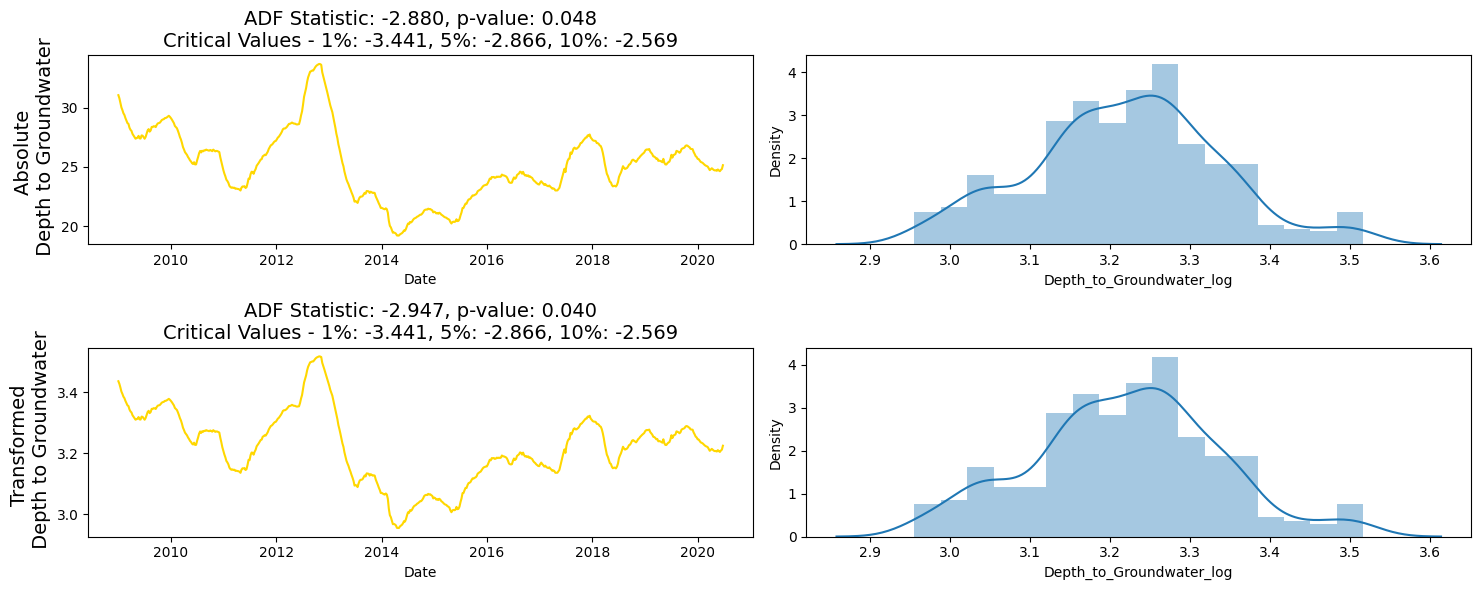

In [17]:
df['Depth_to_Groundwater_log'] = np.log(abs(df.Depth_to_Groundwater)) # Sử dụng phương pháp Log transformation

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
visualize_adfuller_results(abs(df.Depth_to_Groundwater), 'Absolute \n Depth to Groundwater', ax[0, 0])

sns.distplot(df.Depth_to_Groundwater_log, ax=ax[0, 1])
visualize_adfuller_results(df.Depth_to_Groundwater_log, 'Transformed \n Depth to Groundwater', ax[1, 0])

sns.distplot(df.Depth_to_Groundwater_log, ax=ax[1, 1])

plt.tight_layout()
plt.show()

**Nhận xét:**
- *Phân phối ban đầu:*
    - Dữ liệu gốc có vẻ không tuân theo phân phối chuẩn, có thể hơi lệch phải với một số giá trị ngoại lệ.
    - Biểu đồ thời gian cho thấy có sự biến động theo thời gian, với xu hướng tăng giảm không rõ ràng.
    - Kết quả kiểm định ADF (Augmented Dickey-Fuller) với p-value là `0.048`, nhỏ hơn mức ý nghĩa 5%, cho thấy có bằng chứng để bác bỏ giả thuyết null (giả thuyết cho rằng dữ liệu không dừng). Tuy nhiên, giá trị này khá gần với ngưỡng 5% nên có thể cần thêm phân tích để khẳng định tính dừng của dữ liệu.

- *Phân phối sau khi Sử dụng phương pháp Log transformation*:
    - Sau khi biến đổi logarit, phân phối của dữ liệu trở nên đối xứng hơn và gần với phân phối chuẩn hơn.
    - Biểu đồ thời gian vẫn cho thấy sự biến động theo thời gian, nhưng biên độ dao động đã giảm đi.
    - Kết quả kiểm định ADF với p-value là `0.040`, cũng nhỏ hơn mức ý nghĩa 5%, cung cấp thêm bằng chứng về tính dừng của dữ liệu sau khi biến đổi logarit.

$\rightarrow$ ***Việc biến đổi logarit đã giúp cải thiện tính dừng của thuộc tính `Depth_to_Groundwater` và làm cho phân phối của nó trở nên gần với phân phối chuẩn hơn.***

##### 4.3.2. Differencing

***Tiếp tục thực hiện Differencing với `Depth_to_Groundwater` để đánh giá***

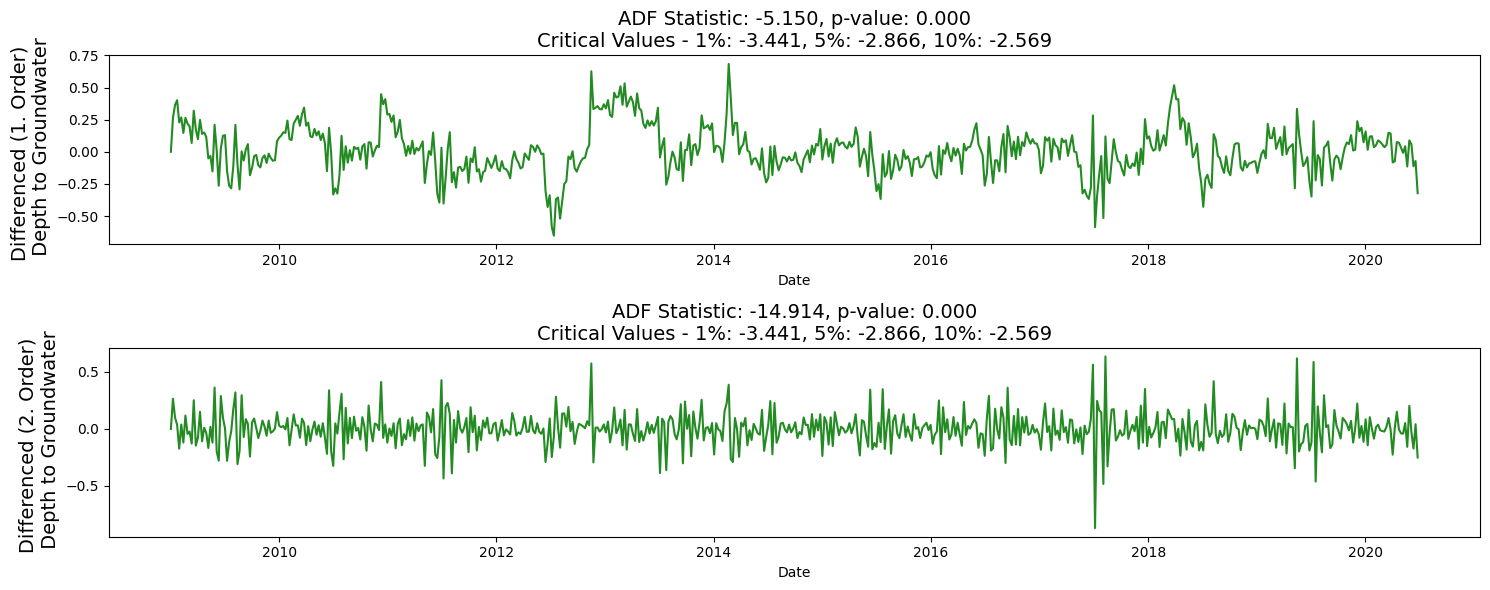

In [18]:
# First Order Differencing
ts_diff = np.diff(df.Depth_to_Groundwater)
df['Depth_to_Groundwater_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(df.Depth_to_Groundwater_diff_1)
df['Depth_to_Groundwater_diff_2'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

visualize_adfuller_results(df.Depth_to_Groundwater_diff_1, 'Differenced (1. Order) \n Depth to Groundwater', ax[0])
visualize_adfuller_results(df.Depth_to_Groundwater_diff_2, 'Differenced (2. Order) \n Depth to Groundwater', ax[1])
plt.tight_layout()
plt.show()

**Nhận xét:**
- *First Order Differencing:*
    - Biểu đồ trên cho thấy chuỗi thời gian sau khi sai phân bậc 1. Có vẻ như xu hướng tăng giảm đã được loại bỏ phần nào, nhưng vẫn còn một số biến động theo thời gian.
    - Kết quả kiểm định ADF cho thấy thống kê ADF là `-5.150`, nhỏ hơn giá trị tới hạn 1% `(-3.441)`. Điều này cho thấy có bằng chứng mạnh mẽ để bác bỏ giả thuyết null (giả thuyết cho rằng chuỗi không dừng). Do đó, có thể kết luận rằng chuỗi sau khi sai phân bậc 1 đã trở nên dừng.

- *Second Order Differencing:*
    - Biểu đồ dưới cho thấy chuỗi thời gian sau khi sai phân bậc 2. Biến động theo thời gian dường như đã giảm đi nhiều hơn so với sau sai phân bậc 1.
    - Kết quả kiểm định ADF cho thấy thống kê ADF là `-14.914`, nhỏ hơn rất nhiều so với giá trị tới hạn 1% `(-3.441)`. Điều này củng cố thêm kết luận rằng chuỗi sau khi sai phân bậc 2 cũng đã trở nên dừng.

$\rightarrow$ **Tóm lại:**
- Cả hai lần sai phân đều có vẻ hiệu quả trong việc loại bỏ xu hướng và làm cho chuỗi thời gian trở nên có tính dừng.

- Tuy nhiên, sai phân bậc 2 dường như làm giảm biến động theo thời gian nhiều hơn so với sai phân bậc 1.

### Lưu dữ liệu vào tệp .csv

In [19]:
save_name = "Water_Cleaner_2.csv"
df.to_csv("../Datasets/" + save_name, index=False)